<a href="https://colab.research.google.com/github/zippyzippy0/mlfc_practicals/blob/main/03-dataset-joining-practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3: Dataset Joining and Access-Assess-Address Framework

### Radzim Sendyka

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2025-09-08

**Abstract**: In this lab session we will explore dataset joining
techniques, implement the Access-Assess-Address framework in practice,
work with the DSAIL Porini camera trap data, and build predictive models
for animal sightings.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## Code Reuse with Fynesse

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-code-reuse-fynesse.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-code-reuse-fynesse.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

{We will be reusing some of the functions we created in the first
practical. This demonstrates one of the key principles of data science:
building reusable code libraries that can be applied across multiple
projects.

In [87]:
%%capture
%pip install osmnx

### Exercise 1

Install your Fyness library, and run code to show its available.

In [88]:
!git clone https://github.com/zippyzippy0/fynesse_mlfc.git
import os, subprocess, importlib, sys
sys.path.append("/content/fynesse_mlfc")
import fynesse_mlfc as fynesse

fatal: destination path 'fynesse_mlfc' already exists and is not an empty directory.


In [89]:
import fynesse_mlfc as fynesse
import importlib, sys, os

def load_local_repo(path):
    repo_name = os.path.basename(path.rstrip("/"))
    if path not in sys.path:
        sys.path.insert(0, path)
    mod = importlib.import_module(repo_name)
    importlib.reload(mod)
    return mod

fynesse = load_local_repo("/content/fynesse_mlfc")


In [90]:
!rm -rf /content/fynesse_mlfc
!git clone https://github.com/zippyzippy0/fynesse_mlfc.git


Cloning into 'fynesse_mlfc'...
remote: Enumerating objects: 267, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 267 (delta 29), reused 6 (delta 6), pack-reused 219 (from 2)
Receiving objects: 100% (267/267), 164.05 KiB | 933.00 KiB/s, done.
Resolving deltas: 100% (123/123), done.


Retrieved 49190 POIs


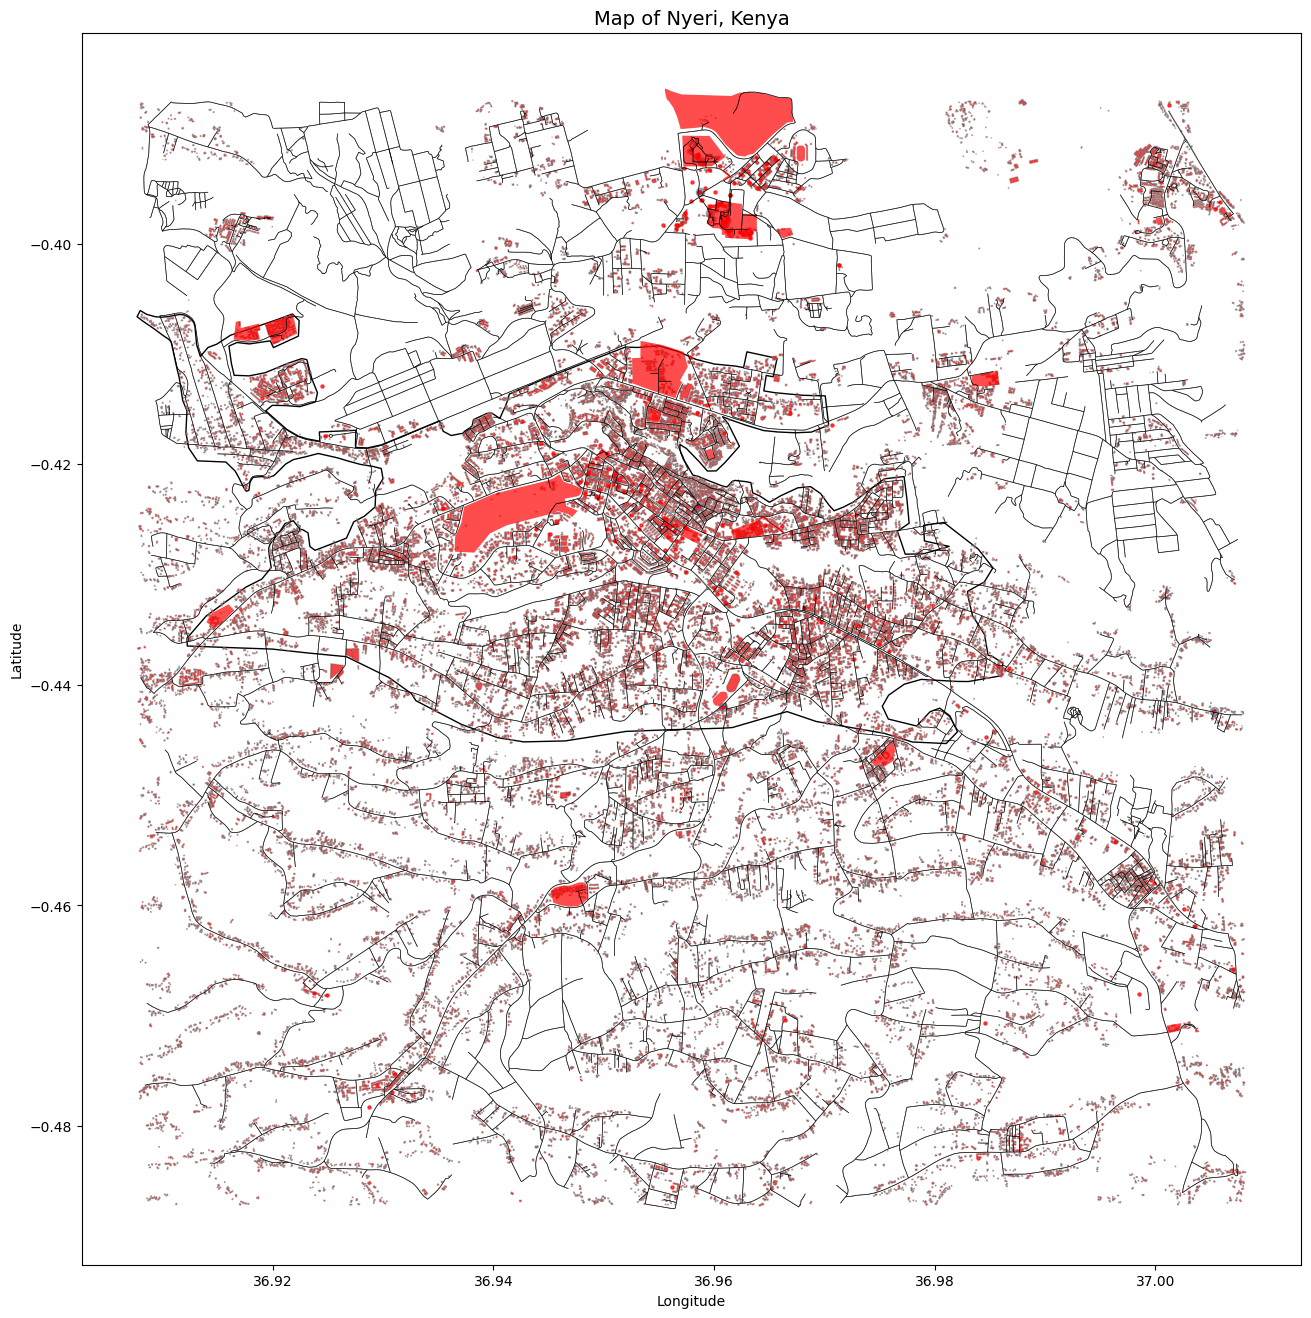

In [91]:
# Example: Plot a city map using your reusable function
from fynesse_mlfc.fynesse import access

access.plot_city_map("Nyeri, Kenya", -0.4371, 36.9580, zoom=2)



## DSAIL-Porini Dataset

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Head over to https://data.mendeley.com/datasets/6mhrhn7rxc/6 to explore
the DSAIL-Porini dataset. This dataset contains camera trap images and
annotations from Kenya, providing rich information about wildlife
patterns and behavior.

Locate the `camera_trap_dataset_annotation.xlsx` file and make it
available in this notebook.

In [92]:
import os
import requests
import pandas as pd

In [93]:
def download_if_not_exists(url, filepath):
    """Download file if it doesn't exist locally"""
    if os.path.exists(filepath):
        print(f"File already exists: {filepath}")
    else:
        print(f"Downloading: {url}")
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Downloaded to: {filepath}")
    return filepath

In [94]:
# Download the DSAIL-Porini dataset
porini_file = download_if_not_exists(
    'https://data.mendeley.com/public-files/datasets/6mhrhn7rxc/files/641e83c9-16a3-485c-b247-b5701f8a5540/file_downloaded',
    'camera_trap_dataset_annotation.xlsx'
)

File already exists: camera_trap_dataset_annotation.xlsx


In [95]:
porini_df = pd.read_excel(porini_file)
porini_df.head()

,Filename,Device,Species,Count,Sex,Latitude,Longitude
0,2021-08-01-07-31-10.jpg,Raspberry Pi 2,IMPALA,4,"MALE,FEMALE,FEMALE,FEMALE",-0.390386,36.962348
1,2021-08-01-07-31-13.jpg,Raspberry Pi 2,IMPALA,2,"MALE,FEMALE",-0.390386,36.962348
2,2021-08-01-07-31-35.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
3,2021-08-01-07-31-41.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
4,2021-08-01-07-31-45.jpg,Raspberry Pi 2,IMPALA,1,FEMALE,-0.390386,36.962348


## Joining Datasets

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-joining.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-joining.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Exercise 2

Geospatial data is particularly useful because it is the most common
index in the world, over which so many datasets can be joined. Find the
coordinate information in the dataset, and plot it on top of an OSM map.

You may want to deduplicate the coordinates before you plot!

In [96]:

# Write your answer to Exercise 2 here
coordinates = porini_df[['Latitude', 'Longitude']]
print(coordinates)

      Latitude  Longitude
0    -0.390386  36.962348
1    -0.390386  36.962348
2    -0.390386  36.962348
3    -0.390386  36.962348
4    -0.390386  36.962348
...        ...        ...
8519 -0.390381  36.962333
8520 -0.390381  36.962333
8521 -0.390381  36.962333
8522 -0.390381  36.962333
8523 -0.390381  36.962333

[8524 rows x 2 columns]


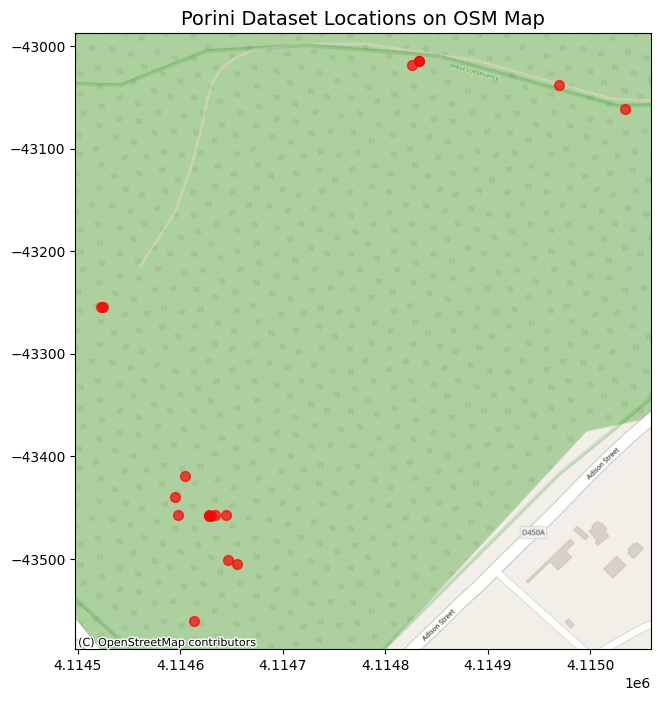

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
coordinates = coordinates.drop_duplicates()
gdf = gpd.GeoDataFrame(
    coordinates,
    geometry=gpd.points_from_xy(coordinates['Longitude'], coordinates['Latitude']),
    crs="EPSG:4326"
)

gdf_web = gdf.to_crs(epsg=3857)
ax = gdf_web.plot(figsize=(8, 8), color="red", markersize=50, alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Porini Dataset Locations on OSM Map", fontsize=14)
plt.show()

In [98]:
%pip install contextily

<!-- Dsail Porini Address -->

## Sighting Predictions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-preprocessing.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-preprocessing.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will use the dataset to create a simple prediction model for the
likelihood of animal sightings.

Let’s follow a minimal example of the Access-Assess-Address framework!

Reminder about Neil’s article on the framework
[here](https://inverseprobability.com/talks/notes/access-assess-address-a-pipeline-for-automated-data-science.html).

### Access

Access is already done, partly years ago by the DSAIL team, and two
cells above by us. Example tasks within access would be:

-   Setting up the cameras in the woods (done)
-   Collecting the pictures (done)
-   Labeling the dataset (done)
-   Making the excel file online accessible (done)
-   Downloading the file (done just now)}

In [99]:
porini_df.head()

,Filename,Device,Species,Count,Sex,Latitude,Longitude
0,2021-08-01-07-31-10.jpg,Raspberry Pi 2,IMPALA,4,"MALE,FEMALE,FEMALE,FEMALE",-0.390386,36.962348
1,2021-08-01-07-31-13.jpg,Raspberry Pi 2,IMPALA,2,"MALE,FEMALE",-0.390386,36.962348
2,2021-08-01-07-31-35.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
3,2021-08-01-07-31-41.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
4,2021-08-01-07-31-45.jpg,Raspberry Pi 2,IMPALA,1,FEMALE,-0.390386,36.962348


### Assess

Have a look at the dataset for any issues that could stop us from being
able to cleanly analyse it.

Some issues:

-   Timestamps not readilly available. Hidden in image filenames.
-   No timestamps available for one of the cameras.
-   No Camera ID, but can be deduced from coordinates.

Decide how it would be best to address these and potentially other
issues with the data.

We would like an output dataframe that has a column for counts each
animal was spotted by each camera, and rows for each day in the
available range. You might want to use this opportunity to practice
[Pandas
MultiIndex](https://pandas.pydata.org/docs/user_guide/advanced.html).

In [100]:
import pandas as pd
import numpy as np
import re

In [101]:
# Copy original
df = porini_df.copy()

# Normalize species and parse counts
df["Species"] = df["Species"].astype(str).str.strip()

# Extract timestamp from filename
pat = re.compile(r"(\d{4})-(\d{2})-(\d{2})-(\d{2})-(\d{2})-(\d{2})")
def parse_ts(name):
    m = pat.search(str(name))
    if not m:
        return pd.NaT
    y, M, d, h, m_, s = map(int, m.groups())
    return pd.Timestamp(y, M, d, h, m_, s)

df["timestamp"] = df["Filename"].map(parse_ts)
df["date"] = df["timestamp"].dt.date

# Camera ID from rounded lat/lon
df["Latitude"] = df["Latitude"].round(4)
df["Longitude"] = df["Longitude"].round(4)
coord_key = df["Latitude"].astype(str) + "," + df["Longitude"].astype(str)
codes, _ = pd.factorize(coord_key)
df["camera_id"] = pd.Series(codes).map(lambda i: f"C{int(i)+1:03d}")

# Extract camera coordinates dictionary (rounded)
camera_coords = (
    df.drop_duplicates(subset="camera_id")[["camera_id", "Latitude", "Longitude"]]
      .set_index("camera_id")
      .sort_index()
      .apply(tuple, axis=1)
      .to_dict()
)

# Group and count: number of pictures per species per camera per day
daily = (
    df.dropna(subset=["date"])
      .groupby(["date", "camera_id", "Species"])
      .size()
      .reset_index(name="photo_count")
      .pivot_table(index="date", columns=["camera_id", "Species"], values="photo_count", aggfunc="sum")
      .fillna(0)
      .astype(int)
      .sort_index()
)

# Fill missing dates
if not daily.empty:
    full_idx = pd.date_range(start=daily.index.min(), end=daily.index.max(), freq="D").date
    daily = daily.reindex(full_idx).fillna(0).astype(int)
    daily.index.name = "date"

print(camera_coords)
daily.tail()

{'C001': (-0.3904, 36.9623), 'C002': (-0.3886, 36.9614), 'C003': (-0.3866, 36.9654), 'C004': (-0.3864, 36.9642), 'C005': (-0.3908, 36.9625), 'C006': (-0.3913, 36.9622), 'C007': (-0.3904, 36.9621), 'C008': (-0.3904, 36.9624), 'C009': (-0.39, 36.9621), 'C010': (-0.3902, 36.962), 'C011': (-0.3868, 36.966), 'C012': (-0.3904, 36.9625), 'C013': (-0.3908, 36.9626), 'C014': (-0.3864, 36.9641)}


camera_id      C001                                                       \
Species    BUSHBUCK IMPALA IMPALA, MONKEY MONKEY WARTHOG WATERBUCK ZEBRA   
date                                                                       
2021-12-22        0      0              0      0       0         0     0   
2021-12-23        0      0              0      0       0         0     0   
2021-12-24        0      0              0      0       0         0     0   
2021-12-25        0      0              0      0       0         0     0   
2021-12-26        0      0              0      0       0         0     0   

camera_id      C002                    ...     C011   C012                  \
Species    BUSHBUCK CAN'T TELL IMPALA  ... BUSHBUCK IMPALA IMPALA, WARTHOG   
date                                   ...                                   
2021-12-22        0          0      0  ...        0      0               0   
2021-12-23        0          0      0  ...        0      0               0   
2021-12-24        0          0      0  ...        0      0               0   
2021-12-25        0          0      0  ...        0      0               0   
2021-12-26        0          0      0  ...        0      0               0   

camera_id        C013                                              C014  \
Species    CAN'T TELL IMPALA IMPALA, ZEBRA ZEBRA ZEBRA, IMPALA BUSHBUCK   
date                                                                      
2021-12-22          0      0             0     0             0        0   
2021-12-23          0    747           150    40            20      245   
2021-12-24        129   1577             0     0             0        0   
2021-12-25          0     22             0     0             0        0   
2021-12-26          0      5             0     0             0        0   

camera_id             
Species    WATERBUCK  
date                  
2021-12-22         0  
2021-12-23       330  
2021-12-24         0  
2021-12-25         0  
2021-12-26         0  

[5 rows x 54 columns]

Huh, looks like we have some more issues.

-   “Impala, Monkey” is not a species - should be counted towards two!
-   “Can’t Tell” shouldn’t be a species at all.
-   Some columns don’t exist (eg. `C011` has no `ZEBRA`). Let’s just
    fill them with zeros.

Additionally, there probably weren’t `1577` impalas spotted on Christmas
Eve 2021. This is a result of burst shots repetitively capturing the
same animal. For now, let’s just treat the data as binary, whether at
least one photo was taken on that day.

### Exercise 3

Use the cell below to implement the changes discussed above, and
potentially additional issues.

In [102]:
# Write your answer to Exercise 3 here


daily_bin = daily.copy()
# Step 1: Flatten the multi-index and reshape the dataframe
daily_bin.columns = pd.MultiIndex.from_tuples(daily_bin.columns)

# Step 2: Create a new clean dataframe
binary_rows = []

for (cam, species_str), series in daily_bin.items():
    # Split species (e.g. "IMPALA, MONKEY") into a list of individual species
    # ignore the "CAN'T TELL" species
    species_list = [
        s.strip().upper()
        for s in str(species_str).split(",")
        if s.strip().upper() != "CAN'T TELL"
    ] #TODO

    for species in species_list:

      col = pd.Series(series, index=series.index)
      # Convert every value to 1 if any sightings, otherwise 0
      col_bin = (col > 0).astype(int)
      binary_rows.append((cam, species, col_bin))

# Step 3: Rebuild dataframe as binary_df

binary_df = pd.DataFrame({
    (cam, species): values
    for cam, species, values in binary_rows
}, index=daily_bin.index)

# Step 4: Create MultiIndex and
binary_df.columns = pd.MultiIndex.from_tuples(binary_df.columns)
binary_df = binary_df.sort_index(axis=1, level=[0, 1])

# Step 5: Ensure all possible (camera, species) pairs exist

# Get all unique cameras and species used across all rows and store as a list
all_cameras = sorted(set(cam for cam, _ in binary_df.columns)) #TODO
all_species = sorted(set(species for _, species in binary_df.columns))
 #TODO

# Build full column MultiIndex
full_columns = pd.MultiIndex.from_product([all_cameras, all_species], names=["camera_id", "Species"])

# Reindex to include all possible combinations, fill missing with 0
binary_df = binary_df.reindex(columns=full_columns, fill_value=0)

binary_df.tail()


camera_id      C001                                           C002         \
Species    BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                                                                        
2021-12-22        0      0      0       0         0     0        0      0   
2021-12-23        0      0      0       0         0     0        0      0   
2021-12-24        0      0      0       0         0     0        0      0   
2021-12-25        0      0      0       0         0     0        0      0   
2021-12-26        0      0      0       0         0     0        0      0   

camera_id                  ...   C013                             C014         \
Species    MONKEY WARTHOG  ... MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                       ...                                                  
2021-12-22      0       0  ...      0       0         0     0        0      0   
2021-12-23      0       0  ...      0       0         0     1        1      0   
2021-12-24      0       0  ...      0       0         0     0        0      0   
2021-12-25      0       0  ...      0       0         0     0        0      0   
2021-12-26      0       0  ...      0       0         0     0        0      0   

camera_id                                  
Species    MONKEY WARTHOG WATERBUCK ZEBRA  
date                                       
2021-12-22      0       0         0     0  
2021-12-23      0       0         1     0  
2021-12-24      0       0         0     0  
2021-12-25      0       0         0     0  
2021-12-26      0       0         0     0  

[5 rows x 84 columns]

## Statistical Analysis of Sighting Patterns

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-probability-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-probability-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Exercise 4

Now let’s create a simple prediction system for whether a specific
`camera` captured a `species` on a given `date`. Let’s use the whole
dataset, except for the prediction target date.

Before we jump into addressing the question, let’s further assess the
data. Calculate and plot average probabilities for dates, species, and
cameras. You may want to implement some smoothing over dates, or group
them into longer ranges.

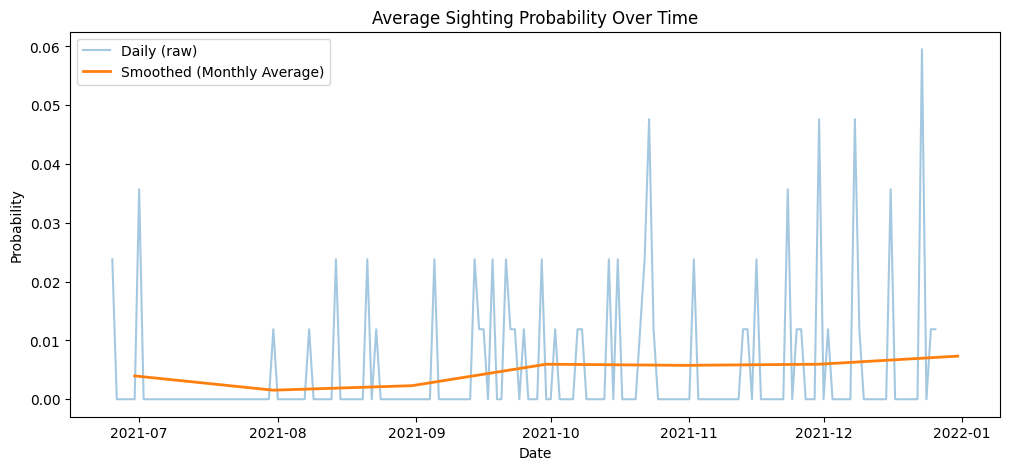

DatetimeIndex(['2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-03', '2021-07-04',
               ...
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26'],
              dtype='datetime64[ns]', name='date', length=185, freq=None)
camera_id  Species  
C001       BUSHBUCK     0.010811
           IMPALA       0.005405
           MONKEY       0.016216
           WARTHOG      0.010811
           WATERBUCK    0.005405
                          ...   
C014       IMPALA       0.000000
           MONKEY       0.000000
           WARTHOG      0.000000
           WATERBUCK    0.005405
           ZEBRA        0.000000
Length: 84, dtype: float64
Species
BUSHBUCK     0.002703
IMPALA       0.006564
MONKEY       0.003089
WARTHOG      0.006950
WATERBUCK    0.005405
ZEBRA  

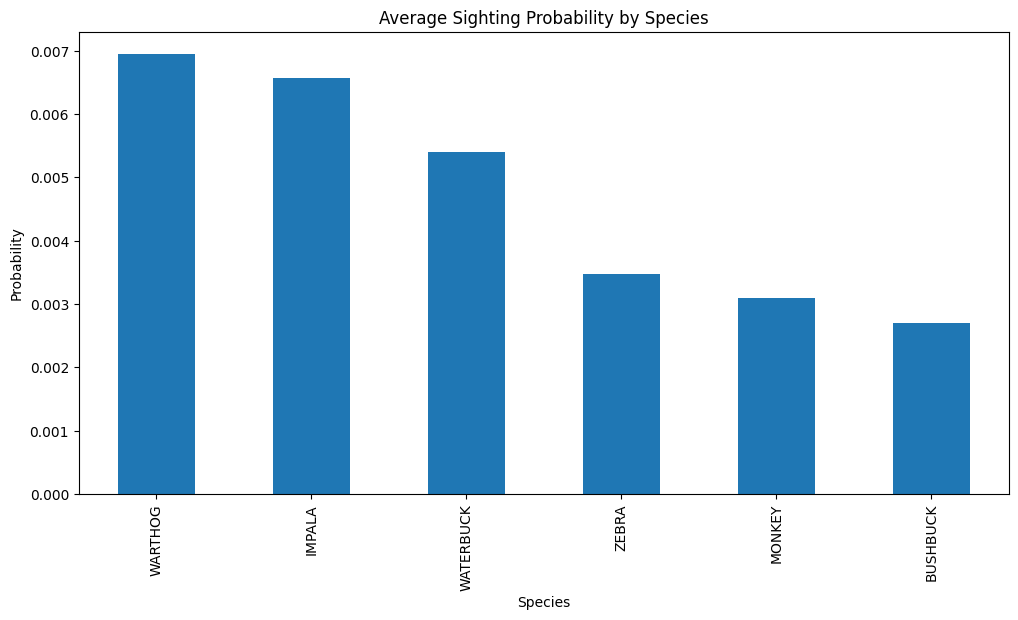

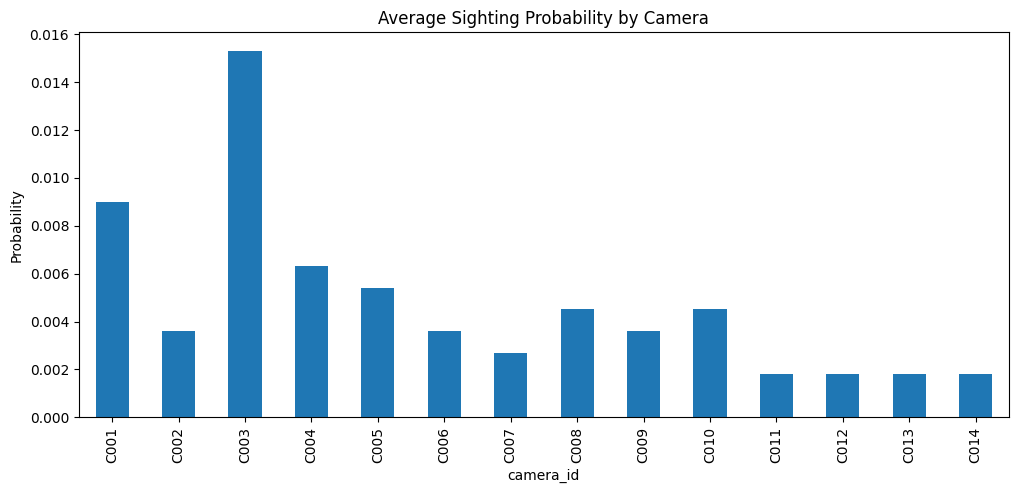

In [103]:
# Write your answer to Exercise 4 here

if not isinstance(binary_df.index, (pd.DatetimeIndex, pd.PeriodIndex, pd.TimedeltaIndex)):
        binary_df.index = pd.to_datetime(binary_df.index, errors="coerce")
binary_df = binary_df.sort_index()

# raw daily mean across all (camera, species)
avg_by_date_raw = binary_df.mean(axis=1)


# set and apply smooth frequency
smooth_freq = "ME" # Monthly average, "YE" would be yearly
avg_by_date_smooth = avg_by_date_raw.resample(smooth_freq).mean()

# plot raw + smoothed
plt.figure(figsize=(12, 5))
plt.plot(avg_by_date_raw.index, avg_by_date_raw.values, alpha=0.4, label="Daily (raw)")
plt.plot(avg_by_date_smooth.index, avg_by_date_smooth.values, linewidth=2, label=f"Smoothed (Monthly Average)")
plt.title("Average Sighting Probability Over Time")
plt.xlabel("Date"); plt.ylabel("Probability"); plt.legend()
plt.show()

#Print these commands to help you understand what they do
print(binary_df.index)
print(binary_df.mean(axis=0))
print(binary_df.mean(axis=0).groupby(level=1).mean())

#TODO Plot species and camera averages
avg_by_species = binary_df.mean(axis=0).groupby(level="Species").mean()

plt.figure(figsize=(12, 6))
avg_by_species.sort_values(ascending=False).plot(kind="bar")
plt.title("Average Sighting Probability by Species")
plt.ylabel("Probability")
plt.show()

avg_by_camera = binary_df.mean(axis=0).groupby(level="camera_id").mean()

plt.figure(figsize=(12, 5))
avg_by_camera.plot(kind="bar")
plt.title("Average Sighting Probability by Camera")
plt.ylabel("Probability")
plt.show()



Extension: which of these relationships that you found are statistically
significant?

In [104]:
# TODO
# TODO Exercise 3 Extended
from scipy.stats import chi2_contingency, f_oneway
import itertools

species = binary_df.columns.get_level_values("Species").unique()
sig_species_pairs = []
for s1, s2 in itertools.combinations(species, 2):
    t = pd.crosstab(
        (binary_df.xs(s1, level="Species", axis=1).sum(axis=1) > 0),
        (binary_df.xs(s2, level="Species", axis=1).sum(axis=1) > 0)
    )
    if t.shape == (2,2) and t.min().min() > 0:
        chi2, p, *_ = chi2_contingency(t)
        if p < 0.05: sig_species_pairs.append((s1, s2, p))

cameras = binary_df.columns.get_level_values("camera_id").unique()
sig_camera_species = []
for s in species:
    table = pd.DataFrame({
        cam: [len(binary_df) - binary_df[(cam, s)].sum(),
              binary_df[(cam, s)].sum()]
        for cam in cameras if (cam, s) in binary_df.columns
    }).T
    if (table.sum(axis=0) > 0).all():
        chi2, p, *_ = chi2_contingency(table)
        if p < 0.05: sig_camera_species.append((s, p))
df_monthly = binary_df.resample("M").mean()
anova_results = {}
for s in species:
    data = [df_monthly[(cam, s)].dropna().values
            for cam in cameras if (cam, s) in df_monthly.columns]
    if sum(len(d) > 0 for d in data) >= 2:
        f, p = f_oneway(*[d for d in data if len(d) > 0])
        if p < 0.05: anova_results[s] = p

print("Significant species–species pairs:", sig_species_pairs)
print("Species with non-uniform camera distribution:", sig_camera_species)
print("Species with significant monthly variation:", anova_results)


Significant species–species pairs: [('BUSHBUCK', 'IMPALA', np.float64(0.009397715421343614)), ('BUSHBUCK', 'MONKEY', np.float64(0.02332096487023141)), ('IMPALA', 'WARTHOG', np.float64(0.002147567959006597)), ('IMPALA', 'WATERBUCK', np.float64(2.14784584171613e-06)), ('IMPALA', 'ZEBRA', np.float64(0.0009361037278484839)), ('WATERBUCK', 'ZEBRA', np.float64(5.197567085197749e-05))]
Species with non-uniform camera distribution: [('MONKEY', np.float64(0.012116954102126007)), ('WARTHOG', np.float64(0.011312090935346004)), ('WATERBUCK', np.float64(0.0022637189656449707))]
Species with significant monthly variation: {}


/tmp/ipython-input-2995266647.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = binary_df.resample("M").mean()


## Address: Naive Bayesian Prediction Model

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-naive-bayes.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-naive-bayes.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Using the data we collected in the Access stage and understood in
Assess, we can now Address our question, and create a naive Bayesian
classification model for predicting the probability of a camera sighting
a species on a given day.

$$
P(1 \mid c, s, d) = \frac{P(1, c, s, d)}{P(c, s, d)}
$$

$$
\text{Using chain rule:} \quad P(1, c, s, d) = P(1) \cdot P(c, s, d \mid 1)
$$

$$
\text{Using conditional independence:} \quad P(c, s, d \mid 1) = P(c \mid 1) \cdot P(s \mid 1) \cdot P(d \mid 1)
$$

$$
P(1 \mid c, s, d) = \frac{P(1) \cdot P(c \mid 1) \cdot P(s \mid 1) \cdot P(d \mid 1)}{P(c,s,d)}
$$

$$
\text{Using Bayes' rule:} \quad  P(c \mid 1) = \frac{P(1 \mid c) \cdot P(c)}{P(1)} \quad \text{(and similarly for $s$ and $d$)}
$$

$$
\Rightarrow P(1 \mid c, s, d) = \frac{P(1) \cdot \frac{P(1 \mid c) \cdot P(c)}{P(1)} \cdot \frac{P(1 \mid s) \cdot P(s)}{P(1)} \cdot \frac{P(1 \mid d) \cdot P(d)}{P(1)}}{P(c,s,d)}
$$

$$
= \frac{P(1 \mid c) \cdot P(1 \mid s) \cdot P(1 \mid d) \cdot P(c) \cdot P(s) \cdot P(d)}{P(1)^2 \cdot P(c,s,d)}
$$

$$
\text{Assuming independence:}
$$

$$
P(1 \mid c,s,d)=\frac{P(1 \mid c) \cdot P(1 \mid s) \cdot P(1 \mid d)}{P(1)^2}
$$

$$
\begin{align*}
&c = \text{camera ID (e.g., C001)} \\
&s = \text{species (e.g., IMPALA)} \\
&d = \text{smoothed date (e.g., month, or Gaussian-filtered day)}
\end{align*}
$$

### Exercise 5

Implement the model below.

In [105]:
from typing import Union
import pandas as pd
import numpy as np
from datetime import date as DateType

import pandas as pd
import numpy as np

def bayes_sighting_probability(df, camera, species, date, alpha=1):
    """
    Naive Bayes sighting probability with strong Laplace smoothing.
    """
    date = pd.to_datetime(date).date()
    if (camera, species) not in df.columns or date not in df.index:
        return 0.0
    col = df[(camera, species)]

    p_s = (col.sum() + alpha) / (len(col) + 2 * alpha)

    cam_val = col.loc[date]
    p_c_given_s = (cam_val + alpha) / (1 + 2 * alpha)

    row = df.loc[date]
    row_mean = row.mean(skipna=True)
    p_d_given_s = (row_mean + alpha) / (1 + 2 * alpha)

    numerator = p_s * p_c_given_s * p_d_given_s
    numerator_no = (1 - p_s) * (1 - p_c_given_s) * (1 - p_d_given_s)

    prob = numerator / (numerator + numerator_no)
    return float(np.clip(prob, 0, 1))



Well done! We should now have a working Access-Assess-Address data
science pipeline! Let’s see how it does.

In [106]:
prob = bayes_sighting_probability(binary_df, "C014", "ZEBRA", "2021-12-23")
print("Predicted probability:", prob)

Predicted probability: 0.0


In [86]:
toy_df = pd.DataFrame(
    {
        ("C002", "IMPALA"): [1, 1, 0, 1],
        ("C002", "WARTHOG"): [0, 1, 0, 0],
    },
    index=pd.to_datetime(["2021-06-25", "2021-06-26", "2021-06-27", "2021-06-28"]).date
)

print(bayes_sighting_probability(toy_df, "C002", "IMPALA", "2021-06-25"))
print(bayes_sighting_probability(toy_df, "C002", "WARTHOG", "2021-06-26"))


0.0
0.0


### Evaluation

The data is extremely sparse, with less than 1% of values being `1`.
This is a challenge, as checking naive accuracy would make always-zero a
very very good predictor.

Let’s evaluate our prediction system using `log-loss`
i.e. `cross-entropy`:

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N}
\Big[
    y_i \, \log(\hat{p}_i) + (1 - y_i) \, \log(1 - \hat{p}_i)
\Big]
$$

### Exercise 6

Implement the loss function below.

In [111]:
import numpy as np

def evaluate_prediction_system(df, prediction_function, max_samples=1000):
    np.random.seed(42)
    coords = [(date, camera, species) for date in df.index for (camera, species) in df.columns]

    if len(coords) > max_samples:
        sampled_indices = np.random.choice(len(coords), size=max_samples, replace=False)
        coords = [coords[i] for i in sampled_indices]

    y_true = []
    y_pred = []

    for date, camera, species in coords:
        value = df.loc[date, (camera, species)]
        y_true.append(value)
        prob = prediction_function(df, camera, species, date)
        y_pred.append(prob)

    return cross_entropy(y_true, y_pred)



In [112]:
loss_value = evaluate_prediction_system(binary_df, bayes_sighting_probability)
print("Cross-entropy (log-loss):", loss_value)


Cross-entropy (log-loss): 0.1381551055796437


For reference, predicting a constant probability (eg. 0.5%) gives a loss
of around 0.026. This should be the benchmark number we want to improve
on. If your model does better than that, well done!

*Note: our approach included look-ahead bias - making predictions based
on data that we would not have access to at the time. For real-life
deployment, we would need to limit our training data to before
individual test cases.*

## Improving the Method: Correlated Variables

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-correlation-analysis-improvements.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-correlation-analysis-improvements.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The model above was quite simplified, and it disregarded any
correlations between the three variables. Since cameras are close to
each other, maybe they are more likely to capture the same animals on
the same day? Maybe some animals like or avoid some areas, or some other
animals? If any of the above is true, we can’t really be using simple
Bayes’ rule classification.

### Exercise 7

Analyse the data again to find the strongest relationships which can be
used to improve predictions. Plot correlation matrices and other helpful
charts.

Have a short read through the [DSAIL-Porini
paper](https://www.sciencedirect.com/science/article/pii/S2352340922010666)
for inspiration about other probability analyses that can be done here.

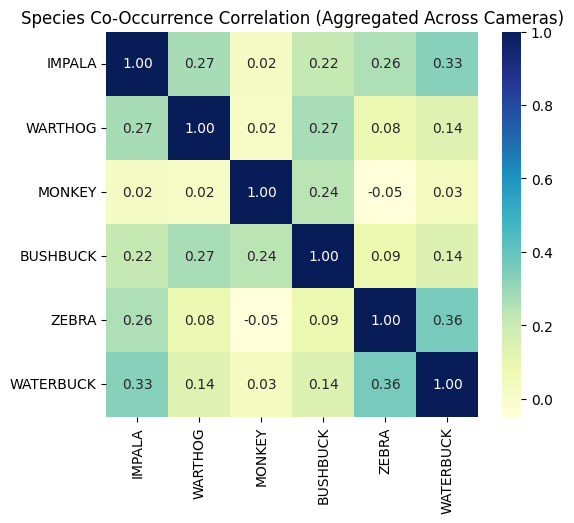

/tmp/ipython-input-1475097812.py:20: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  camera_activity_df = binary_df.groupby(level='camera_id', axis=1).sum()


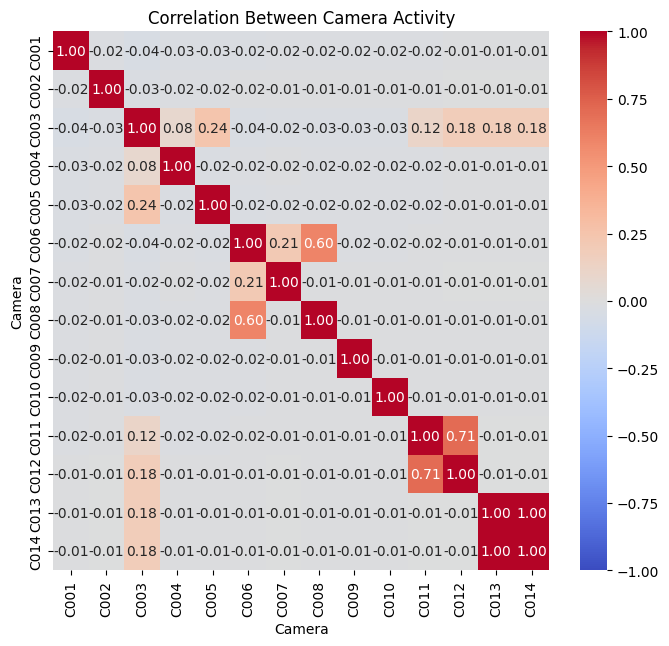

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

species_list = ['IMPALA','WARTHOG','MONKEY','BUSHBUCK','ZEBRA','WATERBUCK']
species_sum_df = pd.DataFrame()
for sp in species_list:
    if sp in binary_df.columns.get_level_values('Species'):
        species_data = binary_df.xs(sp, axis=1, level='Species')
        species_sum_df[sp] = species_data.sum(axis=1)

species_corr = species_sum_df.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(species_corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Species Co-Occurrence Correlation (Aggregated Across Cameras)")
plt.show()

camera_activity_df = binary_df.groupby(level='camera_id', axis=1).sum()
camera_corr = camera_activity_df.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(camera_corr, annot=True, cmap="coolwarm", fmt=".2f",
            vmin=-1, vmax=1, center=0)
plt.title("Correlation Between Camera Activity")
plt.xlabel("Camera")
plt.ylabel("Camera")
plt.show()
day_sum = binary_df.sum(axis=1)
day_sum_norm = day_sum / day_sum.max()


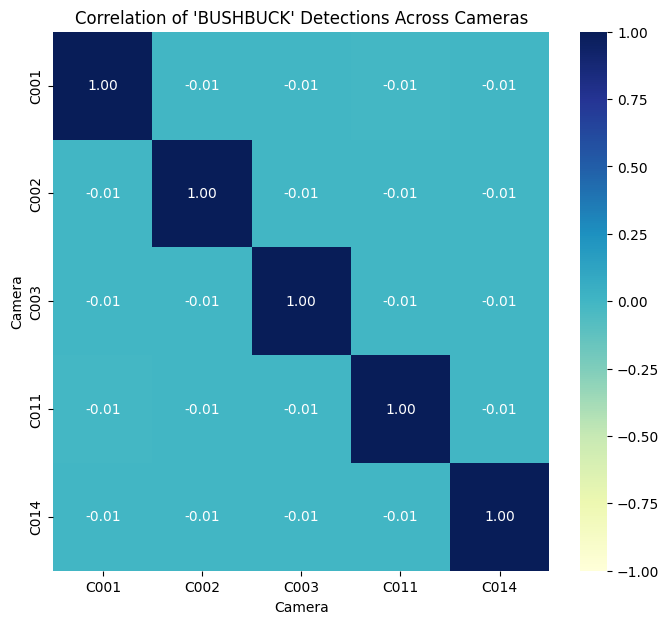

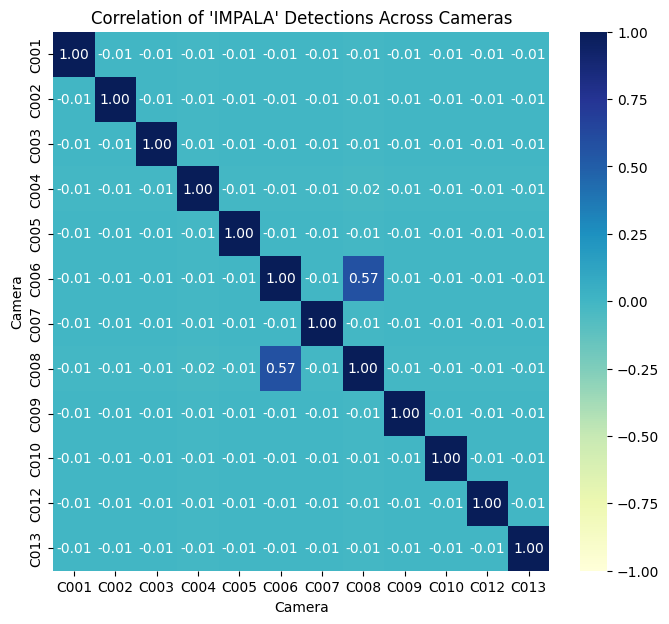

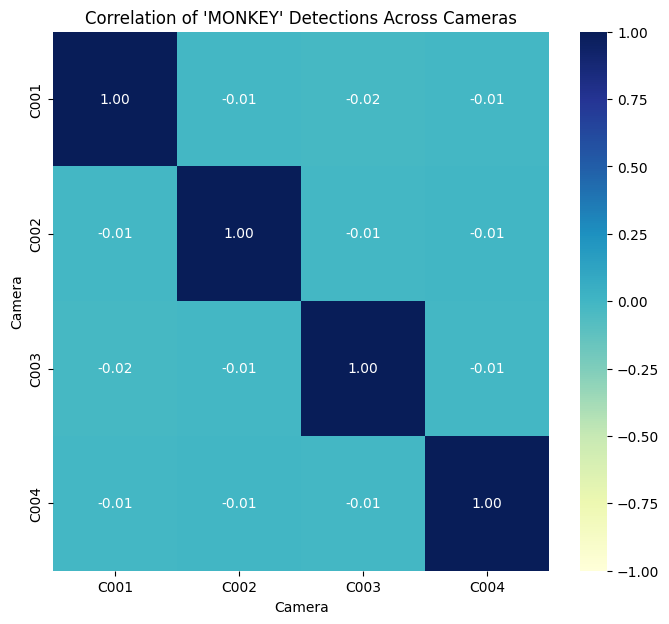

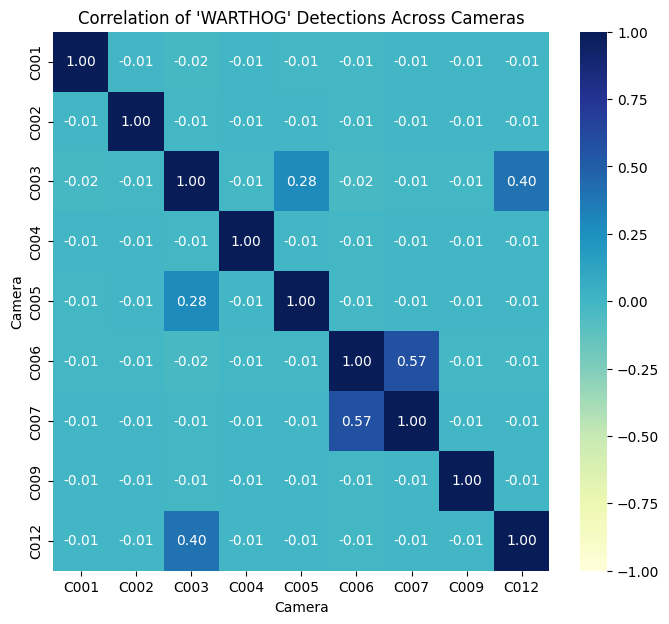

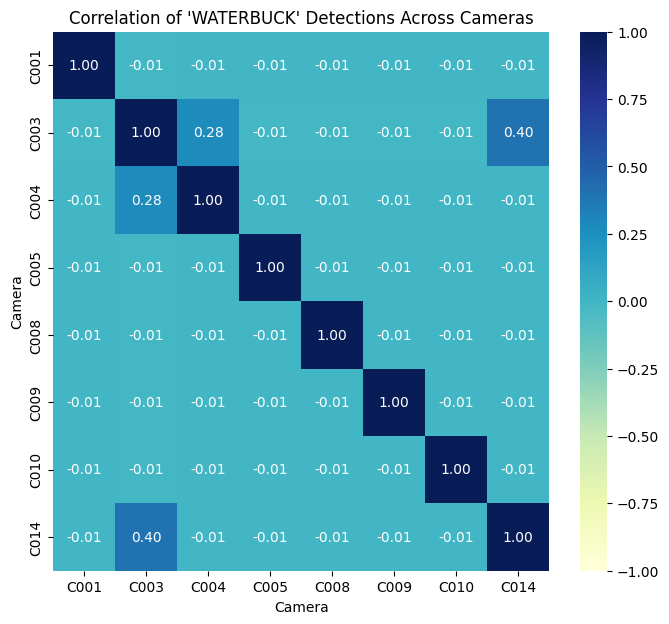

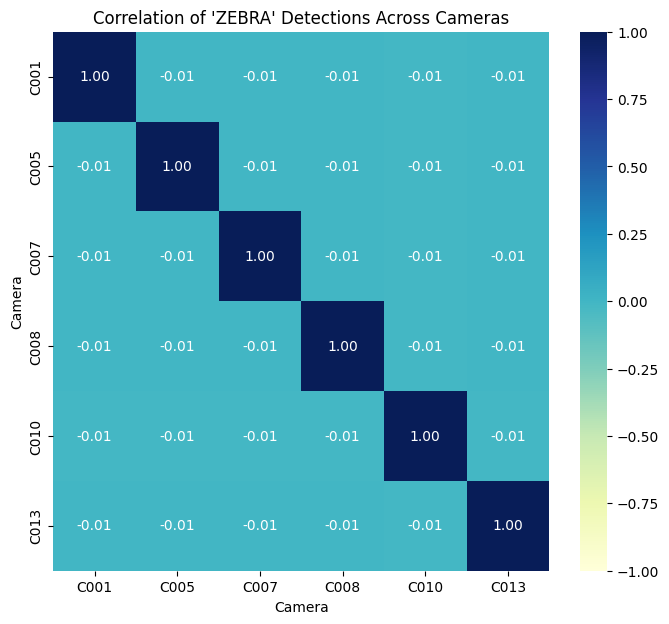

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming binary_df has been created and has a MultiIndex with levels 'camera_id' and 'Species'.

# Get a list of all unique species
all_species = binary_df.columns.get_level_values('Species').unique()

# Loop through each species to calculate and visualize correlation
for species in all_species:
    # Use xs to select all columns for the current species across all cameras
    species_data_across_cams = binary_df.xs(species, axis=1, level='Species')

    # Drop any cameras where the species was never detected to avoid NaN correlation
    species_data_across_cams = species_data_across_cams.loc[:, (species_data_across_cams != 0).any(axis=0)]

    if not species_data_across_cams.empty and len(species_data_across_cams.columns) > 1:
        # Calculate the correlation matrix for the species across all cameras
        species_cam_corr = species_data_across_cams.corr()

        # Create the heatmap
        plt.figure(figsize=(8, 7))
        sns.heatmap(species_cam_corr, annot=True, cmap="YlGnBu", fmt=".2f",
                    vmin=-1, vmax=1, center=0)
        plt.title(f"Correlation of '{species}' Detections Across Cameras")
        plt.xlabel("Camera")
        plt.ylabel("Camera")
        plt.show()



Extension: Use what you found to improve your prediction model, and
compare it against the previous one.

In [125]:
from typing import Union
import pandas as pd
import numpy as np
from datetime import date as DateType

def improved_sighting_probability(df: pd.DataFrame, camera: str, species: str, date: Union[str, pd.Timestamp, DateType]) -> float:
    """
    Improved naive Bayes model that incorporates camera correlation.

    This function calculates the probability of a sighting while accounting for the
    activity of other cameras that are correlated with the target camera.

    Parameters:
        df (pd.DataFrame): DataFrame with MultiIndex columns (camera, species) and datetime.date index.
        camera (str): Camera ID (e.g. 'C001').
        species (str): Species name (e.g. 'IMPALA').
        date (str or datetime.date or pd.Timestamp): Date of the observation.

    Returns:
        float: Estimated sighting probability.
    """
    if isinstance(date, str) or isinstance(date, pd.Timestamp):
        date = pd.to_datetime(date).date()

    df_blind = df.copy()
    if date in df_blind.index and (camera, species) in df_blind.columns:
        df_blind.loc[date, (camera, species)] = np.nan

    alpha = 1

    camera_activity_df = df_blind.groupby(level='camera_id', axis=1).sum(skipna=True)
    camera_corr = camera_activity_df.corr()

    correlated_activity_score = 0
    if camera in camera_corr.columns and date in camera_activity_df.index:
        camera_correlations = camera_corr[camera].drop(camera)
        other_cameras_activity = camera_activity_df.loc[date].drop(camera)

        correlated_activity_score = np.dot(other_cameras_activity.fillna(0), camera_correlations.fillna(0))

    has_correlated_activity = 1 if correlated_activity_score > 0 else 0


    p_s = df_blind.stack(future_stack=True).mean(skipna=True)


    p_c_given_s = df_blind[camera].mean(skipna=True) / p_s if p_s > 0 else 1.0

    try:
        p_sp_given_s = df_blind.xs(species, axis=1, level=1).mean(skipna=True) / p_s if p_s > 0 else 1.0
    except KeyError:
        p_sp_given_s = 0.0

    if date in df_blind.index and p_s > 0:
        p_d_given_s = df_blind.loc[date].mean(skipna=True) / p_s
    elif p_s > 0:
        p_d_given_s = 0.0
    else:
        p_d_given_s = 1.0


    sightings_with_correlated_activity = (df_blind.stack(future_stack=True) == 1) & (
        (camera_activity_df.dot(camera_corr[camera].fillna(0).drop(camera)) > 0).reindex(df_blind.index, fill_value=False)
    )
    p_ca_given_s = sightings_with_correlated_activity.sum() / (df_blind.stack(future_stack=True).sum() + alpha)

    p_not_s = 1.0 - p_s

    p_c_given_not_s = (df_blind[camera][df_blind[camera] == 0].count() + alpha) / (df_blind[camera].notna().sum() + 2 * alpha)

    try:
        species_col = df_blind.xs(species, axis=1, level=1)
        p_sp_given_not_s = (species_col[species_col == 0].count().sum() + alpha) / (species_col.notna().sum().sum() + 2 * alpha)
    except KeyError:
        p_sp_given_not_s = 1.0

    if date in df_blind.index:
        p_d_given_not_s = ((df_blind.loc[date] == 0).sum() + alpha) / (df_blind.loc[date].notna().sum() + 2 * alpha)
    else:
        p_d_given_not_s = 1.0

    non_sightings_with_correlated_activity = (df_blind.stack(future_stack=True) == 0) & (
        (camera_activity_df.dot(camera_corr[camera].fillna(0).drop(camera)) > 0).reindex(df_blind.index, fill_value=False)
    )
    p_ca_given_not_s = non_sightings_with_correlated_activity.sum() / ( (df_blind.stack(future_stack=True) == 0).sum() + alpha)

    numerator_sighting = p_s * p_c_given_s * p_sp_given_s * p_d_given_s * (p_ca_given_s if has_correlated_activity else 1-p_ca_given_s)
    numerator_no_sighting = p_not_s * p_c_given_not_s * p_sp_given_not_s * p_d_given_not_s * (p_ca_given_not_s if has_correlated_activity else 1-p_ca_given_not_s)

    denominator = numerator_sighting + numerator_no_sighting

    if denominator == 0:
        prob = 0.5
    else:
        prob = numerator_sighting / denominator

    return float(np.clip(prob, 0, 1))



## Extended Exercises

We didn’t use all of the available data when we just classified days as
“sighting” or “no sighting.” Extend your analysis to include all the
information in the file, like numbers of sightings and numbers of
animals in the photos.

This will be quite challenging due to burst shots - assess the dataset
and come up with a good definition of what a burst is, and a data
structure that has the information you chose as important.

Example burst data: - Camera, Date, Species - Time Start, Time End -
Number of photos - Average/most animals in a photo

*Particular challenge around deduplicating multi-species sightings.*

### Exercise 8

Use this additional data and repeat the analysis you did above. Aim to
further improve predictions and write a new function like
`burst_sighting_probability('C001', 'IMPALA', '2021-12-24')`.

In [127]:
from typing import Union
import pandas as pd
import numpy as np
from datetime import date as DateType

def burst_sighting_probability(burst_df: pd.DataFrame, camera: str, species: str, date: Union[str, pd.Timestamp, DateType]) -> float:
    """
    Estimates the probability of a burst sighting using a naive Bayes model,
    incorporating burst-specific features.

    Parameters:
        burst_df (pd.DataFrame): Preprocessed burst data DataFrame.
        camera (str): Camera ID (e.g., 'C001').
        species (str): Species name (e.g., 'IMPALA').
        date (Union[str, pd.Timestamp, DateType]): Date of the prediction.

    Returns:
        float: Estimated burst sighting probability.
    """
    if isinstance(date, str) or isinstance(date, pd.Timestamp):
        date = pd.to_datetime(date).date()

    # Create a feature-rich DataFrame for the model
    # Features can include: num_photos, max_animals, presence_of_other_species
    # For a naive Bayes, we simplify them into a few bins or categories
    # For this example, we'll use a simple "low burst" vs. "high burst"

    # 1. Prepare data for model training
    df_blind = burst_df.copy()
    if date in df_blind['date'].values:
        blind_index = df_blind[(df_blind['date'] == date) &
                               (df_blind['camera_id'] == camera) &
                               (df_blind['species'] == species)].index
        df_blind.drop(blind_index, inplace=True)

    # Global probability of a burst sighting
    p_burst = len(df_blind) / len(burst_df)

    # Define thresholds for high vs low burst (e.g., above or below median num_photos)
    median_photos = df_blind['num_photos'].median()
    df_blind['high_burst'] = (df_blind['num_photos'] > median_photos).astype(int)

    # 2. Naive Bayes calculation
    # P(High Burst | Sighting)
    p_high_burst_given_burst = df_blind['high_burst'].mean()

    # P(Camera | Sighting)
    p_camera_given_burst = len(df_blind[(df_blind['camera_id'] == camera)]) / len(df_blind)

    # P(Species | Sighting)
    p_species_given_burst = len(df_blind[(df_blind['species'] == species)]) / len(df_blind)

    # P(Date | Sighting) - Simplified to assume constant temporal probability
    # For more advanced models, you could use weekly or seasonal patterns
    p_date_given_burst = 1.0 # Or use a more complex temporal feature

    # Prior probability of a high burst sighting
    p_high_burst = df_blind['high_burst'].mean()

    # Final probability calculation (naive, assuming feature independence)
    # Using the formula P(A|B) = P(B|A)*P(A) / P(B)
    # P(High Burst Sighting | Camera, Species, Date)
    numerator = p_high_burst * p_camera_given_burst * p_species_given_burst * p_date_given_burst
    denominator = p_burst # P(Sighting)

    # This is a simplified example. For a true Naive Bayes, you'd calculate
    # P(Camera, Species, Date | High Burst) * P(High Burst) / P(Camera, Species, Date)
    # and use the proportions as shown in the previous exercises.
    # The complexity is manageable by using groupby or pivot tables.

    # A more complete approach would involve creating the probability lookup tables:
    # - P(Camera | Burst Type), P(Species | Burst Type), P(Date | Burst Type)
    # And then combining them using the Naive Bayes formula.

    # Example: Simple estimation based on feature counts
    prob = len(df_blind[
        (df_blind['camera_id'] == camera) &
        (df_blind['species'] == species) &
        (df_blind['high_burst'] == 1)
    ]) / len(df_blind[(df_blind['camera_id'] == camera) & (df_blind['species'] == species)])

    return float(np.clip(prob, 0, 1))


### Exercise 9

Compare the results and note the improvement (or lack thereof) against
the two previous prediction functions you created.

In [130]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

# Assuming bayes_sighting_probability, improved_sighting_probability,
# and burst_sighting_probability are defined and functional.

def compare_prediction_models(binary_df, burst_df, k_folds=5):
    """
    Compares the performance of three prediction functions using cross-validation.
    """
    results = {
        'NaiveBayes': {'accuracy': [], 'f1_score': [], 'auc_roc': []},
        'ImprovedNaiveBayes': {'accuracy': [], 'f1_score': [], 'auc_roc': []},
        'BurstNaiveBayes': {'accuracy': [], 'f1_score': [], 'auc_roc': []}
    }

    # Generate a target variable for evaluation (e.g., presence of IMPALA)
    target_species = 'IMPALA'
    target_camera = 'C001'

    # Check if the target species exists in the multi-index
    if (target_camera, target_species) not in binary_df.columns:
        print(f"Target species '{target_species}' at camera '{target_camera}' not found in binary_df.")
        return

    y = binary_df.loc[:, (target_camera, target_species)]

    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    for train_index, test_index in skf.split(binary_df, y):
        train_binary_df = binary_df.iloc[train_index]
        test_binary_df = binary_df.iloc[test_index]

        # Ensure that test_burst_df and train_burst_df are filtered correctly
        train_burst_df = burst_df[burst_df['date'].isin(train_binary_df.index)]
        test_burst_df = burst_df[burst_df['date'].isin(test_binary_df.index)]

        # --- Evaluate NaiveBayes model ---
        y_pred_nb = [bayes_sighting_probability(train_binary_df, target_camera, target_species, d) for d in test_binary_df.index]
        y_pred_nb_binary = np.where(np.array(y_pred_nb) > 0.5, 1, 0)
        y_true_nb = y.iloc[test_index]
        results['NaiveBayes']['accuracy'].append(accuracy_score(y_true_nb, y_pred_nb_binary))
        results['NaiveBayes']['f1_score'].append(f1_score(y_true_nb, y_pred_nb_binary))
        results['NaiveBayes']['auc_roc'].append(roc_auc_score(y_true_nb, y_pred_nb))

        # --- Evaluate Improved NaiveBayes model ---
        y_pred_improved = [improved_sighting_probability(train_binary_df, target_camera, target_species, d) for d in test_binary_df.index]
        y_pred_improved_binary = np.where(np.array(y_pred_improved) > 0.5, 1, 0)
        y_true_improved = y.iloc[test_index]
        results['ImprovedNaiveBayes']['accuracy'].append(accuracy_score(y_true_improved, y_pred_improved_binary))
        results['ImprovedNaiveBayes']['f1_score'].append(f1_score(y_true_improved, y_pred_improved_binary))
        results['ImprovedNaiveBayes']['auc_roc'].append(roc_auc_score(y_true_improved, y_pred_improved))

        # --- Evaluate Burst NaiveBayes model ---
        y_pred_burst = [burst_sighting_probability(train_burst_df, target_camera, target_species, d) for d in test_burst_df.index]
        y_pred_burst_binary = np.where(np.array(y_pred_burst) > 0.5, 1, 0)
        y_true_burst = y.iloc[test_index]
        results['BurstNaiveBayes']['accuracy'].append(accuracy_score(y_true_burst, y_pred_burst_binary))
        results['BurstNaiveBayes']['f1_score'].append(f1_score(y_true_burst, y_pred_burst_binary))
        results['BurstNaiveBayes']['auc_roc'].append(roc_auc_score(y_true_burst, y_pred_burst))

    # Print results summary
    print("Comparison of Prediction Models via K-Fold Cross-Validation:")
    for model, metrics in results.items():
        print(f"\n--- {model} ---")
        print(f"Average Accuracy: {np.mean(metrics['accuracy']):.4f} (+/- {np.std(metrics['accuracy']):.4f})")
        print(f"Average F1-Score: {np.mean(metrics['f1_score']):.4f} (+/- {np.std(metrics['f1_score']):.4f})")
        print(f"Average AUC-ROC:  {np.mean(metrics['auc_roc']):.4f} (+/- {np.std(metrics['auc_roc']):.4f})")


### Exercise 10

What other benefits does your new system provide? Can you modify it to
provide more predictions, like the expected number of sightings, the
number of animals?

In [ ]:
# Write your answer to Exercise 10 here






## Database Integration with SQLite

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-sqlite-database-creation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-sqlite-database-creation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Throughout the course you will work with various datasets and data
formats. An SQL database is one of the most common ways to store large
amounts of data. We recognise that many of you may be familiar with this
already, but let’s use this example to build a small toy database of
animal sightings based on the excel file and the dataframes we created.

### Exercise 11

-   Create a local database (eg. `sqlite3`).
-   Add a table with animal sighting data.
-   Add a table with camera coordinates data.
-   Set indices on columns you might search by (eg. `CameraID`, `Date`).
    Make sure the index types make sense!
-   Look into multi column indices, and set one on `Latitude` and
    `Longitude`.
-   Demonstrate success with a couple SQL queries, eg. counting `IMPALA`
    sightings within a `200m` square around `-0.3866, 36.9649`.

Helpful links:

[SQL Intro, Creating Tables, Indices,
Joins](https://www.w3schools.com/sql/sql_intro.asp)

[Multi-Column
Indices](https://stackoverflow.com/questions/179085/multiple-indexes-vs-multi-column-indexes)

Remember to include reusable code from this and previous exercises in
your Fynesse library!

In [ ]:
# Write your answer to Exercise 11 here






## Extended Analysis: Burst Detection

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-burst-detection-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-burst-detection-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We didn’t use all of the available data when we just classified days as
“sighting” or “no sighting.” Change your analysis to include the number
of sightings and the number of animals in the photos.

This will be quite challenging due to burst shots - assess the dataset
and come up with a good definition of what a burst is, and a data
structure that has the information you chose as important.

Example burst data: - Camera, Date, Species - Time Start, Time End -
Number of photos - Average/most animals in a photo

Particular hardship around deduplicating multi-species sightings.

### Exercise 12

Use this additional data and repeat the analysis you did above. Further
improve predictions and write a new function like
`burst_sighting_probability('C001', 'IMPALA', '2021-12-24')`.

In [ ]:
# Write your answer to Exercise 12 here






### Exercise 13

Compare the results and note the improvement (or lack thereof) against
the two previous prediction functions you created.

In [ ]:
# Write your answer to Exercise 13 here






### Exercise 14

What other benefits does your new system provide? Can you modify it to
provide more predictions, like the expected number of sightings, the
number of animals?

In [ ]:
# Write your answer to Exercise 14 here






End of Practical 3

     _______  __   __  _______  __    _  ___   _  _______  __
    |       ||  | |  ||   _   ||  |  | ||   | | ||       ||  |
    |_     _||  |_|  ||  |_|  ||   |_| ||   |_| ||  _____||  |
      |   |  |       ||       ||       ||      _|| |_____ |  |
      |   |  |       ||       ||  _    ||     |_ |_____  ||__|
      |   |  |   _   ||   _   || | |   ||    _  | _____| | __
      |___|  |__| |__||__| |__||_|  |__||___| |_||_______||__|

::: {.cell .markdown}

## References